In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
import os
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [2]:
datasetPath = '../WinEarthPhotosByKeyword/'

In [16]:
#Constants
trueClasses = ['Aurora']
falseClasses = ['Cupola75Photos','Day','DockUndock','Moon','Night','Stars60Photos','Structure','SunriseSunset','Volcano20Photos']
imageX = 64
imageY = 64
kRange = range(1,60)

In [4]:
tureImages = []
falseImages = []

for trueClass in trueClasses:
    tureImages = sum([tureImages,os.listdir(datasetPath + trueClass)],[])

for falseClass in falseClasses:
    falseImages = sum([falseImages,os.listdir(datasetPath + falseClass)],[])

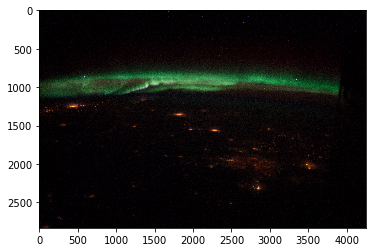

(2832, 4256, 3)
feature size: 36158976


In [5]:
img1 = mpimg.imread(datasetPath + trueClasses[0] +"/"+tureImages[0])
plt.imshow(img1)
plt.show()
print(img1.shape)
print('feature size: ' + str(img1.shape[0]*img1.shape[1] * img1.shape[2]))

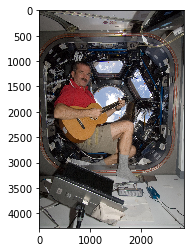

(4288, 2848, 3)
feature size: 36636672


In [6]:
img2 = mpimg.imread(datasetPath + falseClasses[0] +"/"+falseImages[0])
plt.imshow(img2)
plt.show()
print(img2.shape)
print('feature size: ' + str(img2.shape[0]*img2.shape[1] * img2.shape[2]))

In [7]:
def forceLandscape(image):
    if image.shape[0] > image.shape[1]:
        return np.rot90(image)
    return image

def resizeImage(image, x,y):
    return scipy.misc.imresize(image,(x,y), interp='nearest')

def grayscale(image):
    return np.dot(image[...,:3], [0.21, 0.72, 0.07])

def reshape(image):
    return image.flatten()

In [8]:
def formatImage(image):
    image = forceLandscape(image)
    image = resizeImage(image, imageX, imageY)
    image = grayscale(image)
    return image

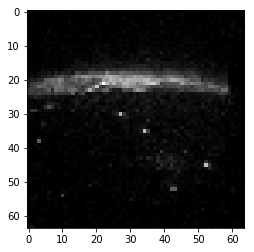

(64, 64)
feature size: 4096


In [9]:
formateImg1 = formatImage(img1)
plt.imshow(formateImg1, cmap='gray')
plt.show()
print(formateImg1.shape)
print('feature size: ' + str(formateImg1.shape[0]*formateImg1.shape[1]))

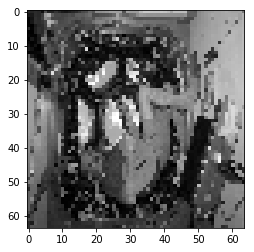

(64, 64)
feature size: 4096


In [10]:
formateImg2 = formatImage(img2)
plt.imshow(formateImg2, cmap='gray')
plt.show()
print(formateImg2.shape)
print('feature size: ' + str(formateImg2.shape[0]*formateImg2.shape[1]))

In [13]:
data = sum([tureImages, falseImages],[])
labels = []
maskedLabels = []
for trueClass in trueClasses:
    newLabels = [trueClass] * len(os.listdir(datasetPath + trueClass))
    labels = sum([labels , newLabels], [])
    newLabels = [trueClass] * len(os.listdir(datasetPath + trueClass))
    maskedLabels = sum([maskedLabels , newLabels], [])

for falseClass in falseClasses:
    newLabels = [falseClass] * len(os.listdir(datasetPath + falseClass))
    labels = sum([labels , newLabels], [])
    newLabels = ['False'] * len(os.listdir(datasetPath + falseClass))
    maskedLabels = sum([maskedLabels , newLabels], [])

In [14]:
#loading should take long
images = []
for i in range(0, len(data)):
    imagePath = datasetPath + labels[i] + "/" +  data[i]
    img = mpimg.imread(imagePath)
    img = formatImage(img)
    img = reshape(img)
    images.append(img)
    
print("loading complete")

loading complete


In [18]:
highest = 0
std = 99
for k in kRange: 
    knn = neighbors.KNeighborsClassifier(k, weights='distance')
    scores = cross_val_score(knn, images, maskedLabels, cv=5)
    if scores.mean() > highest:
        highest = scores.mean()
        std = scores.std() * 2
        print("Accuracy(%s): %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))
        print(scores)
    elif scores.mean() == highest and scores.std() < std:
        highest = scores.mean()
        std = scores.std() * 2
        print("Accuracy(%s): %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))
        print(scores)

Accuracy(1): 0.82 (+/- 0.17)
[ 0.9122807   0.92982456  0.73684211  0.77777778  0.74853801]
Accuracy(2): 0.82 (+/- 0.17)
[ 0.9122807   0.92982456  0.73684211  0.77777778  0.74853801]
Accuracy(3): 0.82 (+/- 0.17)
[ 0.93567251  0.9122807   0.73099415  0.79532164  0.74853801]
Accuracy(4): 0.83 (+/- 0.15)
[ 0.91812865  0.91812865  0.73684211  0.80116959  0.77192982]
Accuracy(8): 0.84 (+/- 0.15)
[ 0.92982456  0.92397661  0.75438596  0.78362573  0.79532164]
Accuracy(9): 0.84 (+/- 0.13)
[ 0.91812865  0.92397661  0.79532164  0.80116959  0.77777778]
Accuracy(10): 0.85 (+/- 0.13)
[ 0.92982456  0.92397661  0.78947368  0.79532164  0.79532164]
Accuracy(11): 0.85 (+/- 0.12)
[ 0.91812865  0.92397661  0.8245614   0.8128655   0.77777778]
Accuracy(12): 0.86 (+/- 0.12)
[ 0.92982456  0.92397661  0.83040936  0.80701754  0.79532164]
Accuracy(18): 0.86 (+/- 0.11)
[ 0.92982456  0.92397661  0.84795322  0.81871345  0.80116959]
Accuracy(38): 0.86 (+/- 0.05)
[ 0.88888889  0.88888889  0.87134503  0.83040936  0.8421

In [1]:
clf = svm.SVC()
scores = cross_val_score(clf, images, maskedLabels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

NameError: name 'svm' is not defined

In [20]:
gnb = GaussianNB()
scores = cross_val_score(gnb, images, maskedLabels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.71 (+/- 0.34)
[ 0.92982456  0.83040936  0.43859649  0.61403509  0.73684211]
